In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
df = pd.read_csv('Final_data.csv')
df

,Person,Wav file,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE,language
0,phon_R01_S01,1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,...,0.065450,0.022110,21.033000,1,4.147830e-01,-4.813031,0.266482,2.301442,0.284654,English
1,phon_R01_S01,2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,...,0.094030,0.019290,19.085000,1,4.583590e-01,-4.075192,0.335590,2.486855,0.368674,English
2,phon_R01_S01,3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,...,0.082700,0.013090,20.651000,1,4.298950e-01,-4.443179,0.311173,2.342259,0.332634,English
3,phon_R01_S01,4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,...,0.087710,0.013530,20.644000,1,4.349690e-01,-4.117501,0.334147,2.405554,0.368975,English
4,phon_R01_S01,5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,...,0.104700,0.017670,19.649000,1,4.173560e-01,-3.747787,0.234513,2.332180,0.410335,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,Giovanni N,FB1GNIEOGVL47M100220171227.wav,109.480629,169.344661,75.000000,18.529456,4.851695,4.851695,6.338581,0.000459,...,0.004924,3.613740,0.276722,1,-1.442695e-10,20.681959,45.920800,0.238455,0.012165,Italian
974,Giovanni N,VE1GNIEOGVL47M100220171217.wav,117.583634,124.685684,104.243866,1.874697,0.387523,0.387523,0.500678,0.002283,...,0.021001,2.524645,0.396095,1,-1.442695e-10,1.328195,2.862934,0.032206,0.000000,Italian
975,Giovanni N,VE2GNIEOGVL47M100220171217.wav,117.149051,120.438432,114.999626,0.984730,0.356262,0.356262,0.542042,0.002757,...,0.026160,2.384145,0.419438,1,-1.442695e-10,1.532805,2.832705,0.919261,0.000000,Italian
976,Giovanni N,VU1GNIEOGVL47M100220171224.wav,115.155070,132.099881,107.920019,1.632779,0.411457,0.411457,0.491512,0.000582,...,0.019963,1.997651,0.500588,1,-1.442695e-10,1.385324,2.844660,0.045541,0.000000,Italian


In [3]:
df.columns

Index(['Person', 'Wav file', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer (dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'spread1', 'spread2', 'D2', 'PPE', 'language'],
      dtype='object')

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Person                0
Wav file              0
MDVP:Fo(Hz)           0
MDVP:Fhi(Hz)          0
MDVP:Flo(Hz)          0
MDVP:Jitter(%)        0
MDVP:Jitter(Abs)      0
MDVP:RAP              0
MDVP:PPQ              0
Jitter:DDP            0
MDVP:Shimmer          0
MDVP:Shimmer (dB)     0
Shimmer:APQ3          0
Shimmer:APQ5          0
MDVP:APQ              0
Shimmer:DDA           0
NHR                   0
HNR                   0
status                0
RPDE                  0
spread1               0
spread2               0
D2                    0
PPE                  12
language              0
dtype: int64

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,9.780000e+02,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,966.000000
mean,158.007047,213.238856,118.721585,7.986537,2.167202,2.167831,2.914301,0.003196,0.008474,-44.985927,...,4.684167e-03,0.020215,404.078559,4.603794,0.594070,9.772676e-02,10.777728,26.570975,0.607364,0.044455
std,39.055395,91.236235,42.611636,10.566513,2.708013,2.707510,3.781503,0.005556,0.013810,24.959183,...,1.187287e-02,0.020763,8358.915432,8.798269,0.491322,2.030780e-01,20.081649,40.236987,0.910481,0.090279
min,86.257127,90.749557,65.476000,0.001680,0.000007,0.000680,0.000920,0.000014,0.000011,-99.458189,...,3.277792e-10,0.000539,0.000650,0.000004,0.000000,-1.442695e-10,-7.964984,0.006274,0.005576,0.000000
25%,126.022657,150.868941,79.009558,1.059022,0.372211,0.372211,0.539902,0.000327,0.000898,-60.938406,...,8.264765e-07,0.005990,1.912383,0.305529,0.000000,-1.442695e-10,1.555188,3.147212,0.035881,0.000000
50%,153.998974,194.525933,109.810714,2.650771,0.829123,0.829123,0.983854,0.001147,0.002685,-51.420403,...,6.700124e-06,0.015345,2.297072,0.435337,1.000000,-1.442695e-10,3.420105,7.204311,0.165681,-0.000000
75%,182.431943,242.272250,148.587526,13.360522,3.695631,3.695631,5.205679,0.003881,0.009346,-40.587682,...,9.555924e-05,0.025499,3.273018,0.522908,1.000000,-1.442695e-10,15.267445,39.580668,0.637197,0.023006
max,484.880130,600.000000,470.750459,69.253350,23.962757,23.962757,44.243249,0.064330,0.119080,1.302000,...,1.377800e-01,0.169420,228779.330000,33.047000,1.000000,6.851510e-01,148.697938,369.212867,3.671155,0.527367


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             978 non-null    object 
 1   Wav file           978 non-null    object 
 2   MDVP:Fo(Hz)        978 non-null    float64
 3   MDVP:Fhi(Hz)       978 non-null    float64
 4   MDVP:Flo(Hz)       978 non-null    float64
 5   MDVP:Jitter(%)     978 non-null    float64
 6   MDVP:Jitter(Abs)   978 non-null    float64
 7   MDVP:RAP           978 non-null    float64
 8   MDVP:PPQ           978 non-null    float64
 9   Jitter:DDP         978 non-null    float64
 10  MDVP:Shimmer       978 non-null    float64
 11  MDVP:Shimmer (dB)  978 non-null    float64
 12  Shimmer:APQ3       978 non-null    float64
 13  Shimmer:APQ5       978 non-null    float64
 14  MDVP:APQ           978 non-null    float64
 15  Shimmer:DDA        978 non-null    float64
 16  NHR                978 non

In [8]:
df['status'].value_counts()

status
1    581
0    397
Name: count, dtype: int64

We can observe there are 147 rows with status 1 (Parkinson) and 48 rows for zero (Healthy). Where the healthy data is underrepresented (minority class) and this can make our model biased. So, we are using SMOTE (Synthetic Minority Oversampling Technique) for data augmentation

In [14]:
from imblearn.over_sampling import SMOTE
x=df.drop(['status','Person','Wav file','language','PPE'],axis=1)
y=df['status']
smote = SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)
print("Shape of the dataframe before data augmentation:",x.shape)
print("Shape of the dataframe after data augmentation:",x_resampled.shape)

Shape of the dataframe before data augmentation: (978, 20)
Shape of the dataframe after data augmentation: (1162, 20)


In [16]:
df=pd.concat([x_resampled,y_resampled],axis=1)
df.shape

(1162, 21)

In [17]:
df['status'].value_counts()

status
1    581
0    581
Name: count, dtype: int64

In [18]:
df.isnull().sum()

MDVP:Fo(Hz)          0
MDVP:Fhi(Hz)         0
MDVP:Flo(Hz)         0
MDVP:Jitter(%)       0
MDVP:Jitter(Abs)     0
MDVP:RAP             0
MDVP:PPQ             0
Jitter:DDP           0
MDVP:Shimmer         0
MDVP:Shimmer (dB)    0
Shimmer:APQ3         0
Shimmer:APQ5         0
MDVP:APQ             0
Shimmer:DDA          0
NHR                  0
HNR                  0
RPDE                 0
spread1              0
spread2              0
D2                   0
status               0
dtype: int64

Now the data is balanced. We can see both the classes have same number of examples for the machine to learn.

In [19]:
df1=df.select_dtypes(include=np.number)
correlation = df1.corr()
print(correlation['status'].sort_values(ascending=False))


status               1.000000
MDVP:Shimmer         0.268413
Shimmer:DDA          0.258453
Shimmer:APQ3         0.249183
MDVP:APQ             0.236070
D2                   0.234941
Shimmer:APQ5         0.224768
Jitter:DDP           0.224718
RPDE                 0.196990
MDVP:Shimmer (dB)    0.175431
HNR                  0.131719
NHR                  0.041189
MDVP:RAP            -0.004011
MDVP:Jitter(Abs)    -0.004140
MDVP:PPQ            -0.005763
MDVP:Jitter(%)      -0.063955
MDVP:Fhi(Hz)        -0.121843
spread2             -0.133997
spread1             -0.135767
MDVP:Flo(Hz)        -0.161707
MDVP:Fo(Hz)         -0.177495
Name: status, dtype: float64


<Axes: >

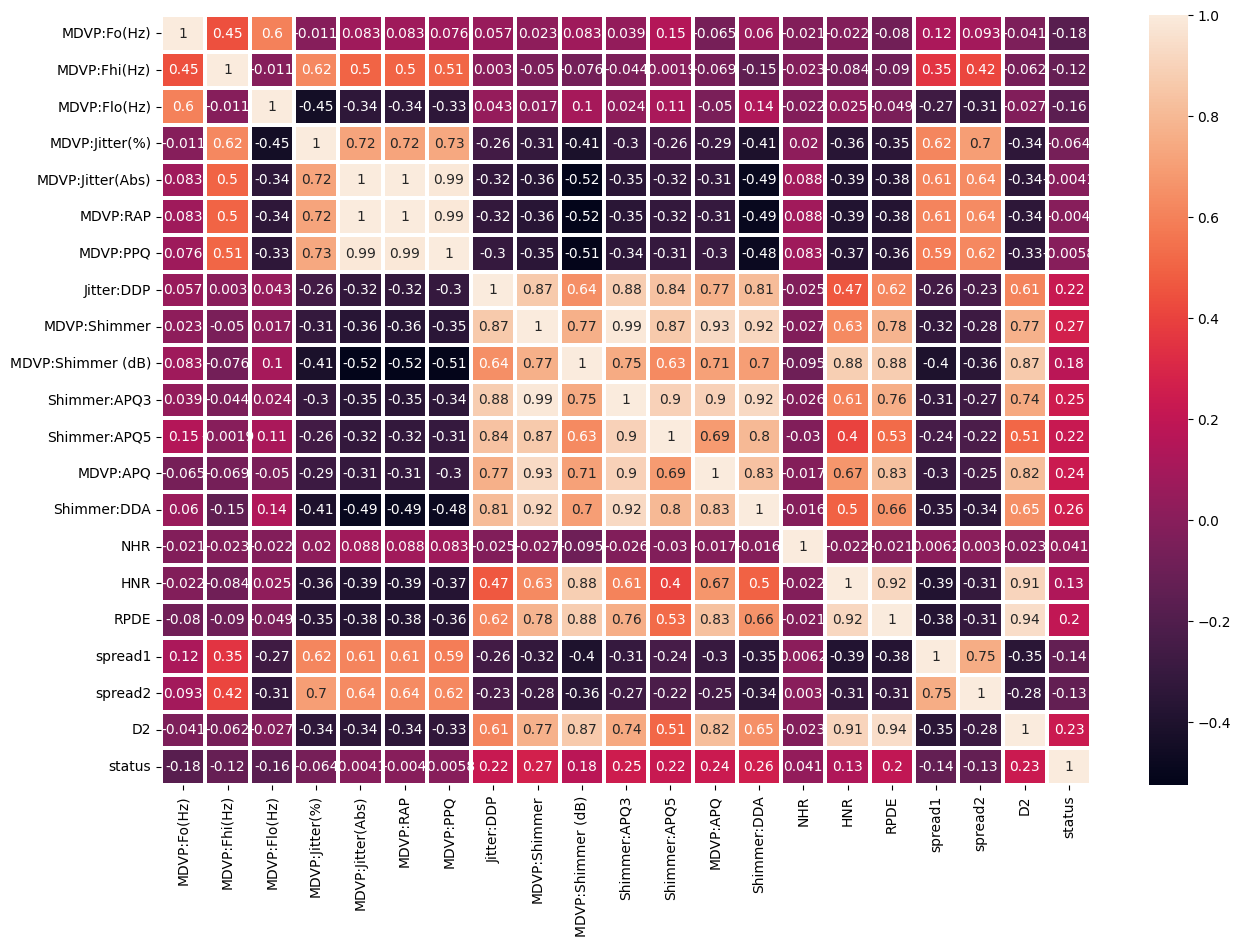

In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation, annot=True, linewidths=1.5, ax=ax)


Features like spread1, PPE,and spread2 have strong positive correlations with 'status'. These features increase as the status increases, which means they might be good predictors for the model. Features like HNR, MDVP:Fo(Hz), and MDVP:Fhi(Hz) have strong negative correlations. As these feature values increase, the status tends to decrease, which also suggests they could be significant predictors.

Implementing the PCA for feature selection which shows atleast 95% of the total variance in the dataset, and these selected features are used for the model training

Standardizing the features because giving every number an equal chance to be considered without any unfair advantage.

In [28]:
features = df.drop('status',axis=1)
target = df['status']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled= pd.DataFrame(features_scaled)
features_scaled.columns = features.columns
features_scaled

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,spread1,spread2,D2
0,-1.013606,-0.630674,-1.052236,-0.767069,-0.823138,-0.822118,-0.792964,1.570257,2.782084,1.914756,2.522741,2.520711,2.308124,2.373192,-0.044554,1.930458,1.670785,-0.776089,-0.667005,1.986361
1,-0.951576,-0.724446,-0.138602,-0.766896,-0.823134,-0.821758,-0.792578,2.120306,4.143024,1.923024,3.878855,3.941976,3.570115,3.838938,-0.044554,1.705057,1.894679,-0.740786,-0.665303,2.198249
2,-1.098872,-0.914535,-0.191883,-0.766819,-0.823130,-0.821459,-0.792347,2.581575,3.446316,1.917071,3.341823,3.266159,2.867303,3.257870,-0.044555,1.886258,1.748431,-0.758393,-0.665905,2.033006
3,-1.099026,-0.841269,-0.196331,-0.766869,-0.823130,-0.821618,-0.792572,2.334535,3.646590,1.918518,3.579712,3.416682,3.031714,3.514812,-0.044555,1.885448,1.774501,-0.742810,-0.665339,2.105339
4,-1.116080,-0.798892,-0.213063,-0.766599,-0.823123,-0.821039,-0.792002,3.224263,4.368043,1.921288,4.385974,4.256334,3.657741,4.386156,-0.044555,1.770317,1.684005,-0.725121,-0.667792,2.021488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.607561,0.013973,-0.559827,1.247291,0.120216,0.120025,0.010474,-0.300638,-0.433294,-0.334478,-0.368305,-0.402497,-0.375117,0.220211,-0.044237,-0.450316,-0.460378,0.100558,2.533952,-0.569679
1158,0.940926,0.107186,1.076350,-0.139091,0.686259,0.686167,0.634148,-0.268861,-0.446709,-0.699588,-0.335023,-0.309393,-0.374649,0.191943,-0.043404,-0.472770,-0.460378,0.307278,0.780821,-0.485477
1159,-1.379030,-1.144317,-0.552394,-0.602273,-0.644257,-0.644580,-0.621691,-0.456969,-0.544926,-0.704823,-0.491193,-0.555539,-0.375540,-0.375976,-0.044322,-0.438883,-0.460378,-0.453041,-0.577111,-0.619690
1160,-1.312676,-1.049403,-0.710365,-0.442645,-0.682748,-0.683078,-0.667681,-0.353002,-0.315445,-0.122450,-0.417617,-0.344574,-0.374887,-0.374968,-0.044311,-0.441895,-0.460378,-0.391308,-0.504087,-0.616668


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_scaled)
print(f"Number of components chosen: {pca.n_components_}")

Number of components chosen: 9


In [31]:
print(pd.DataFrame(pca.components_,columns=features_scaled.columns,index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9']))


      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
PC-1    -0.005199     -0.092144      0.060601       -0.201456   
PC-2     0.067654      0.315963     -0.205734        0.319768   
PC-3     0.666219      0.318454      0.576306       -0.054420   
PC-4    -0.202453     -0.220281     -0.128561        0.008490   
PC-5     0.043858     -0.047246      0.101816       -0.097830   
PC-6     0.081856     -0.063264     -0.052023        0.100284   
PC-7    -0.109834      0.636970     -0.257602        0.432554   
PC-8     0.252118     -0.161427     -0.395406       -0.138140   
PC-9    -0.232795     -0.182937      0.336867        0.181626   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
PC-1         -0.225879 -0.225762 -0.221571    0.251232      0.287226   
PC-2          0.327623  0.327806  0.330847    0.192174      0.206484   
PC-3         -0.017862 -0.017904 -0.019811    0.091103      0.025301   
PC-4         -0.041478 -0.041426 -0.043708    0.285621      0

Implementing Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost algorithms and comparing them

1.Logistic Regression

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
scores = cross_val_score(model_logistic, features_pca, target, cv=5)
print("Accuracy scores for each fold:")
print(scores)
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
accuracy_lr = scores.mean()


Accuracy scores for each fold:
[0.68240343 0.49785408 0.59482759 0.65948276 0.67672414]
Mean Accuracy: 0.62 (+/- 0.14)


2.Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
scores = cross_val_score(rf, features_pca, target, cv=10) 
print("Accuracy scores for each fold:")
print(scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())
accuracy_rf = scores.mean()

Accuracy scores for each fold:
[0.8034188  0.72649573 0.63793103 0.71551724 0.73275862 0.67241379
 0.67241379 0.82758621 0.81896552 0.75862069]
Mean Accuracy: 0.7366121426466254
Standard Deviation of Accuracy: 0.06208773500581522


3.K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn,features_pca, target, cv=10)
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation of scores:", scores.std())
accuracy_knn = scores.mean()


Cross-validated scores: [0.84615385 0.73504274 0.62931034 0.67241379 0.68965517 0.64655172
 0.69827586 0.80172414 0.77586207 0.74137931]
Average score: 0.7236368994989684
Standard deviation of scores: 0.06598616777560597


4.Gradient Boosting Machines (GBM)

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
scores = cross_val_score(gbm, features_pca, target, cv=10)  
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation of scores:", scores.std())
accuracy_gbm = scores.mean()

Cross-validated scores: [0.74358974 0.67521368 0.55172414 0.69827586 0.69827586 0.6637931
 0.62931034 0.81034483 0.74137931 0.77586207]
Average score: 0.6987768936044798
Standard deviation of scores: 0.07102280819515988


5.XGBoost

In [36]:
import xgboost as xgb
from sklearn.model_selection import KFold
xgbclf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, max_depth=3, seed=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(xgbclf, features_pca, target, cv=kf, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Average accuracy:",scores.mean())
print("Standard deviation of scores:", scores.std())
accuracy_xgbclf = scores.mean()

Cross-validated scores: [0.71794872 0.82905983 0.68103448 0.73275862 0.75862069 0.75862069
 0.75862069 0.77586207 0.78448276 0.71551724]
Average accuracy: 0.7512525788387856
Standard deviation of scores: 0.0394784450165856


6.LightGBM

In [37]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators=100, learning_rate=0.05, num_leaves=31)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, features_pca, target, cv=kf, scoring='roc_auc')
print("Cross-validated scores:", scores)
print("Average score:", np.mean(scores))
print("Standard deviation of scores:", np.std(scores))
accuracy_lgbm = scores.mean()

[LightGBM] [Info] Number of positive: 462, number of negative: 467
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 929, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497309 -> initscore=-0.010764
[LightGBM] [Info] Start training from score -0.010764
[LightGBM] [Info] Number of positive: 467, number of negative: 462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 929, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502691 -> initscore=0.010764
[LightGBM] [Info] Start training from score 0.010764
[LightGBM] [Info] Number of 

7.CatBoost

In [39]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, features_pca, target, cv=kf, scoring='roc_auc')
print("Cross-validated scores:", scores)
print("Average AUC:", scores.mean())
print("Standard deviation of AUC:", scores.std())
accuracy_catboost = scores.mean()

Cross-validated scores: [0.88043639 0.87151703 0.89964318 0.89713861 0.86026623]
Average AUC: 0.8818002858496247
Standard deviation of AUC: 0.014999693847859147


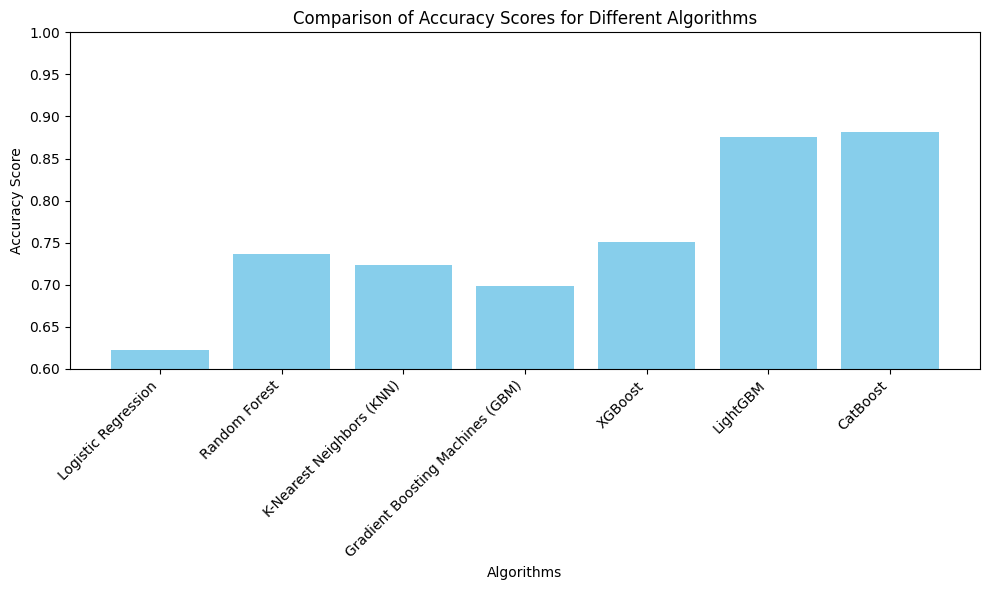

In [46]:
import matplotlib.pyplot as plt
algorithms = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors (KNN)', 
              'Gradient Boosting Machines (GBM)', 'XGBoost', 'LightGBM', 'CatBoost']
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_knn, accuracy_gbm, accuracy_xgbclf, accuracy_lgbm, accuracy_catboost]
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Algorithms')
plt.ylim(0.6, 1)  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


After evaluating multiple machine learning algorithms, we can observe catboost and lightgbm outperforms other models.